In [2]:
import json
import os
import copy
import numpy as np

tag = dict()
all_info = []

for root,middle,files in os.walk("/Users/gaobohao/db/sample2000/tags/"):
    for i in sorted(files)[1:]:
        with open(os.path.join(root,i),'r') as f:
            for k in  json.load(f).keys():
                tag[k] = 0
print(tag)
       
    

{'1girl': 0, 'blue eyes': 0, 'solo': 0, 'blonde hair': 0, 'brown hair': 0, 'brown eyes': 0, 'short hair': 0, 'long hair': 0, 'hat': 0, 'open mouth': 0, 'black hair': 0, 'school uniform': 0, 'serafuku': 0, 'blue hair': 0, 'red eyes': 0, 'looking at viewer': 0, 'green eyes': 0, 'hairband': 0, 'blush': 0, 'capelet': 0, 'headgear': 0, 'chibi': 0, 'animal ears': 0, 'cat ears': 0, 'one eye closed': 0, 'breasts': 0, 'bare shoulders': 0, 'cleavage': 0, 'gloves': 0, 'wolf ears': 0, 'silver hair': 0, 'twintails': 0, 'green hair': 0, 'smile': 0, 'purple eyes': 0, 'purple hair': 0, 'fruit': 0, 'food': 0, '1boy': 0, 'pink hair': 0, 'face': 0, 'yellow eyes': 0, 'white hair': 0, 'closed eyes': 0, 'bunny ears': 0, 'red hair': 0, 'lips': 0, 'ribbon': 0, 'fang': 0, 'hair ornament': 0, 'aqua hair': 0, 'pointy ears': 0, 'glasses': 0, 'detached sleeves': 0, ':d': 0, 'pink eyes': 0, 'hair bobbles': 0, 'collarbone': 0, 'bow': 0, 'ponytail': 0, 'side ponytail': 0, 'white background': 0, 'hair bow': 0, 'oekaki

In [3]:
print(len(tag))
for root,middle,files in os.walk("/Users/gaobohao/db/sample2000/tags/"):
    for i in sorted(files)[1:]:
        with open(os.path.join(root,i),'r') as f:
            one_tag = copy.deepcopy(tag)
            for k ,v in  json.load(f).items():
                one_tag[k] = v
            all_info.append(list(one_tag.values()))

x = np.array(all_info)
print(x.shape)

156
(2000, 156)


In [4]:

pca = PCA(n_components=50)
pca_y = pca.fit_transform(x)
t_sne = TSNE(n_components=2, perplexity=30.0)
Y = t_sne.fit_transform(pca_y)
    

<Figure size 432x288 with 0 Axes>

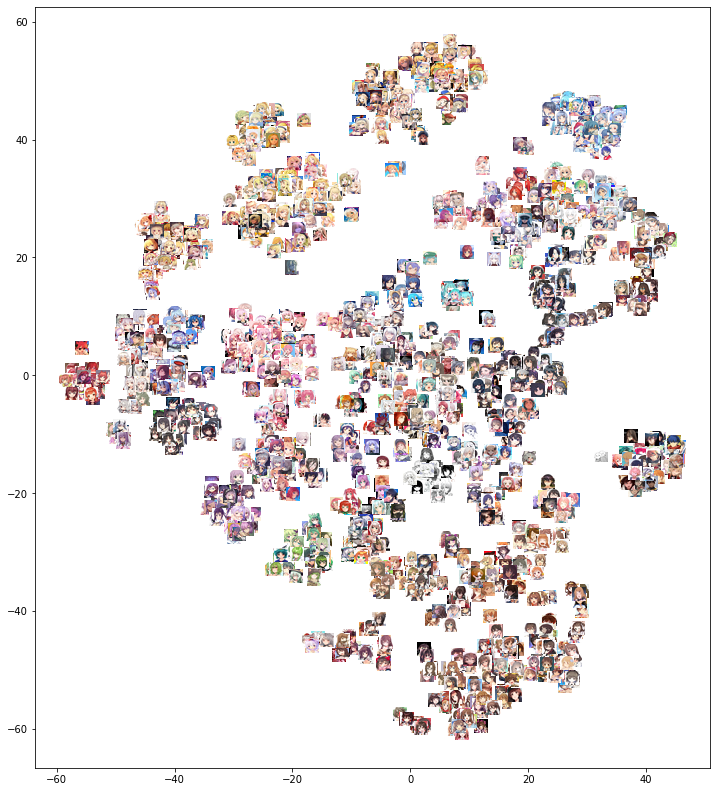

<Figure size 432x288 with 0 Axes>

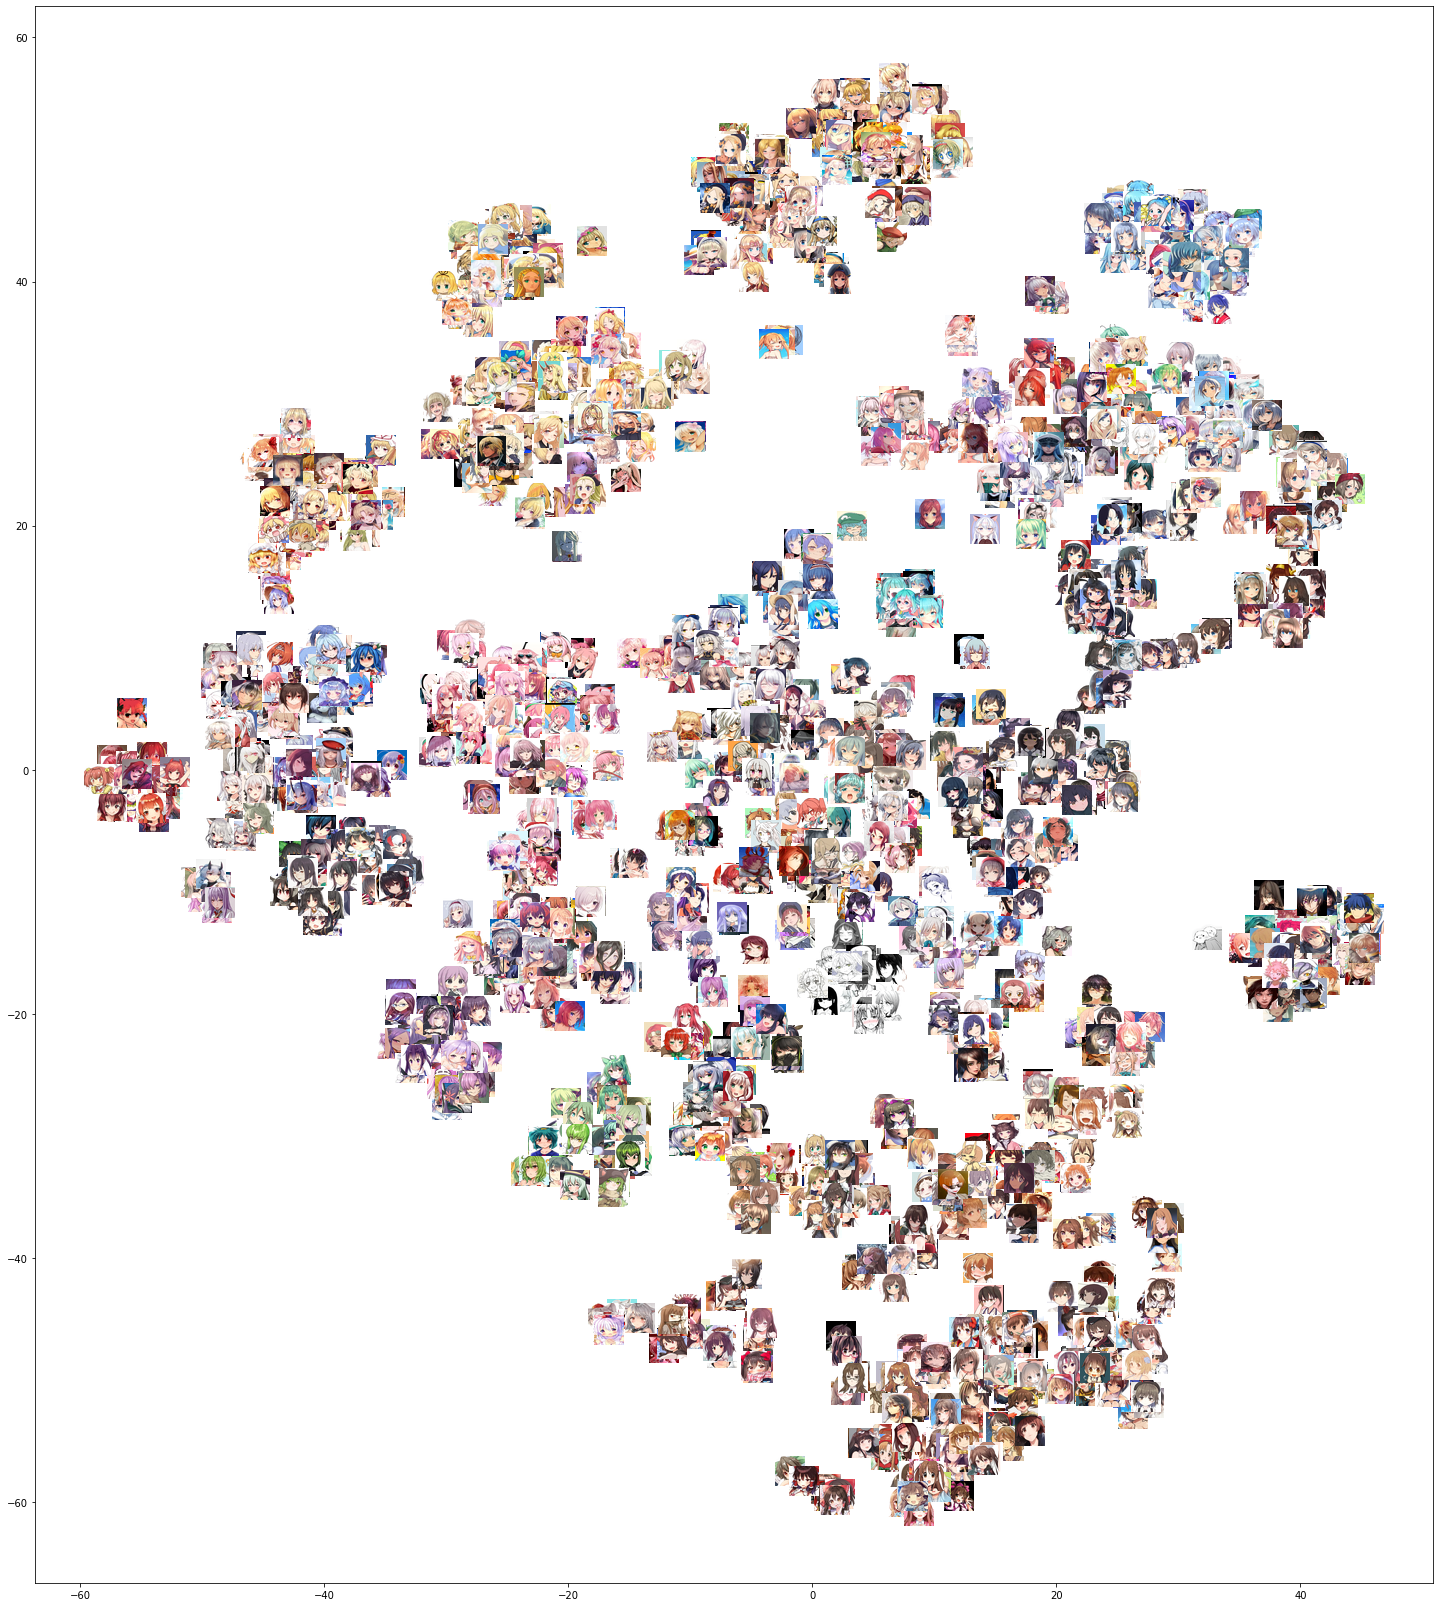

<Figure size 432x288 with 0 Axes>

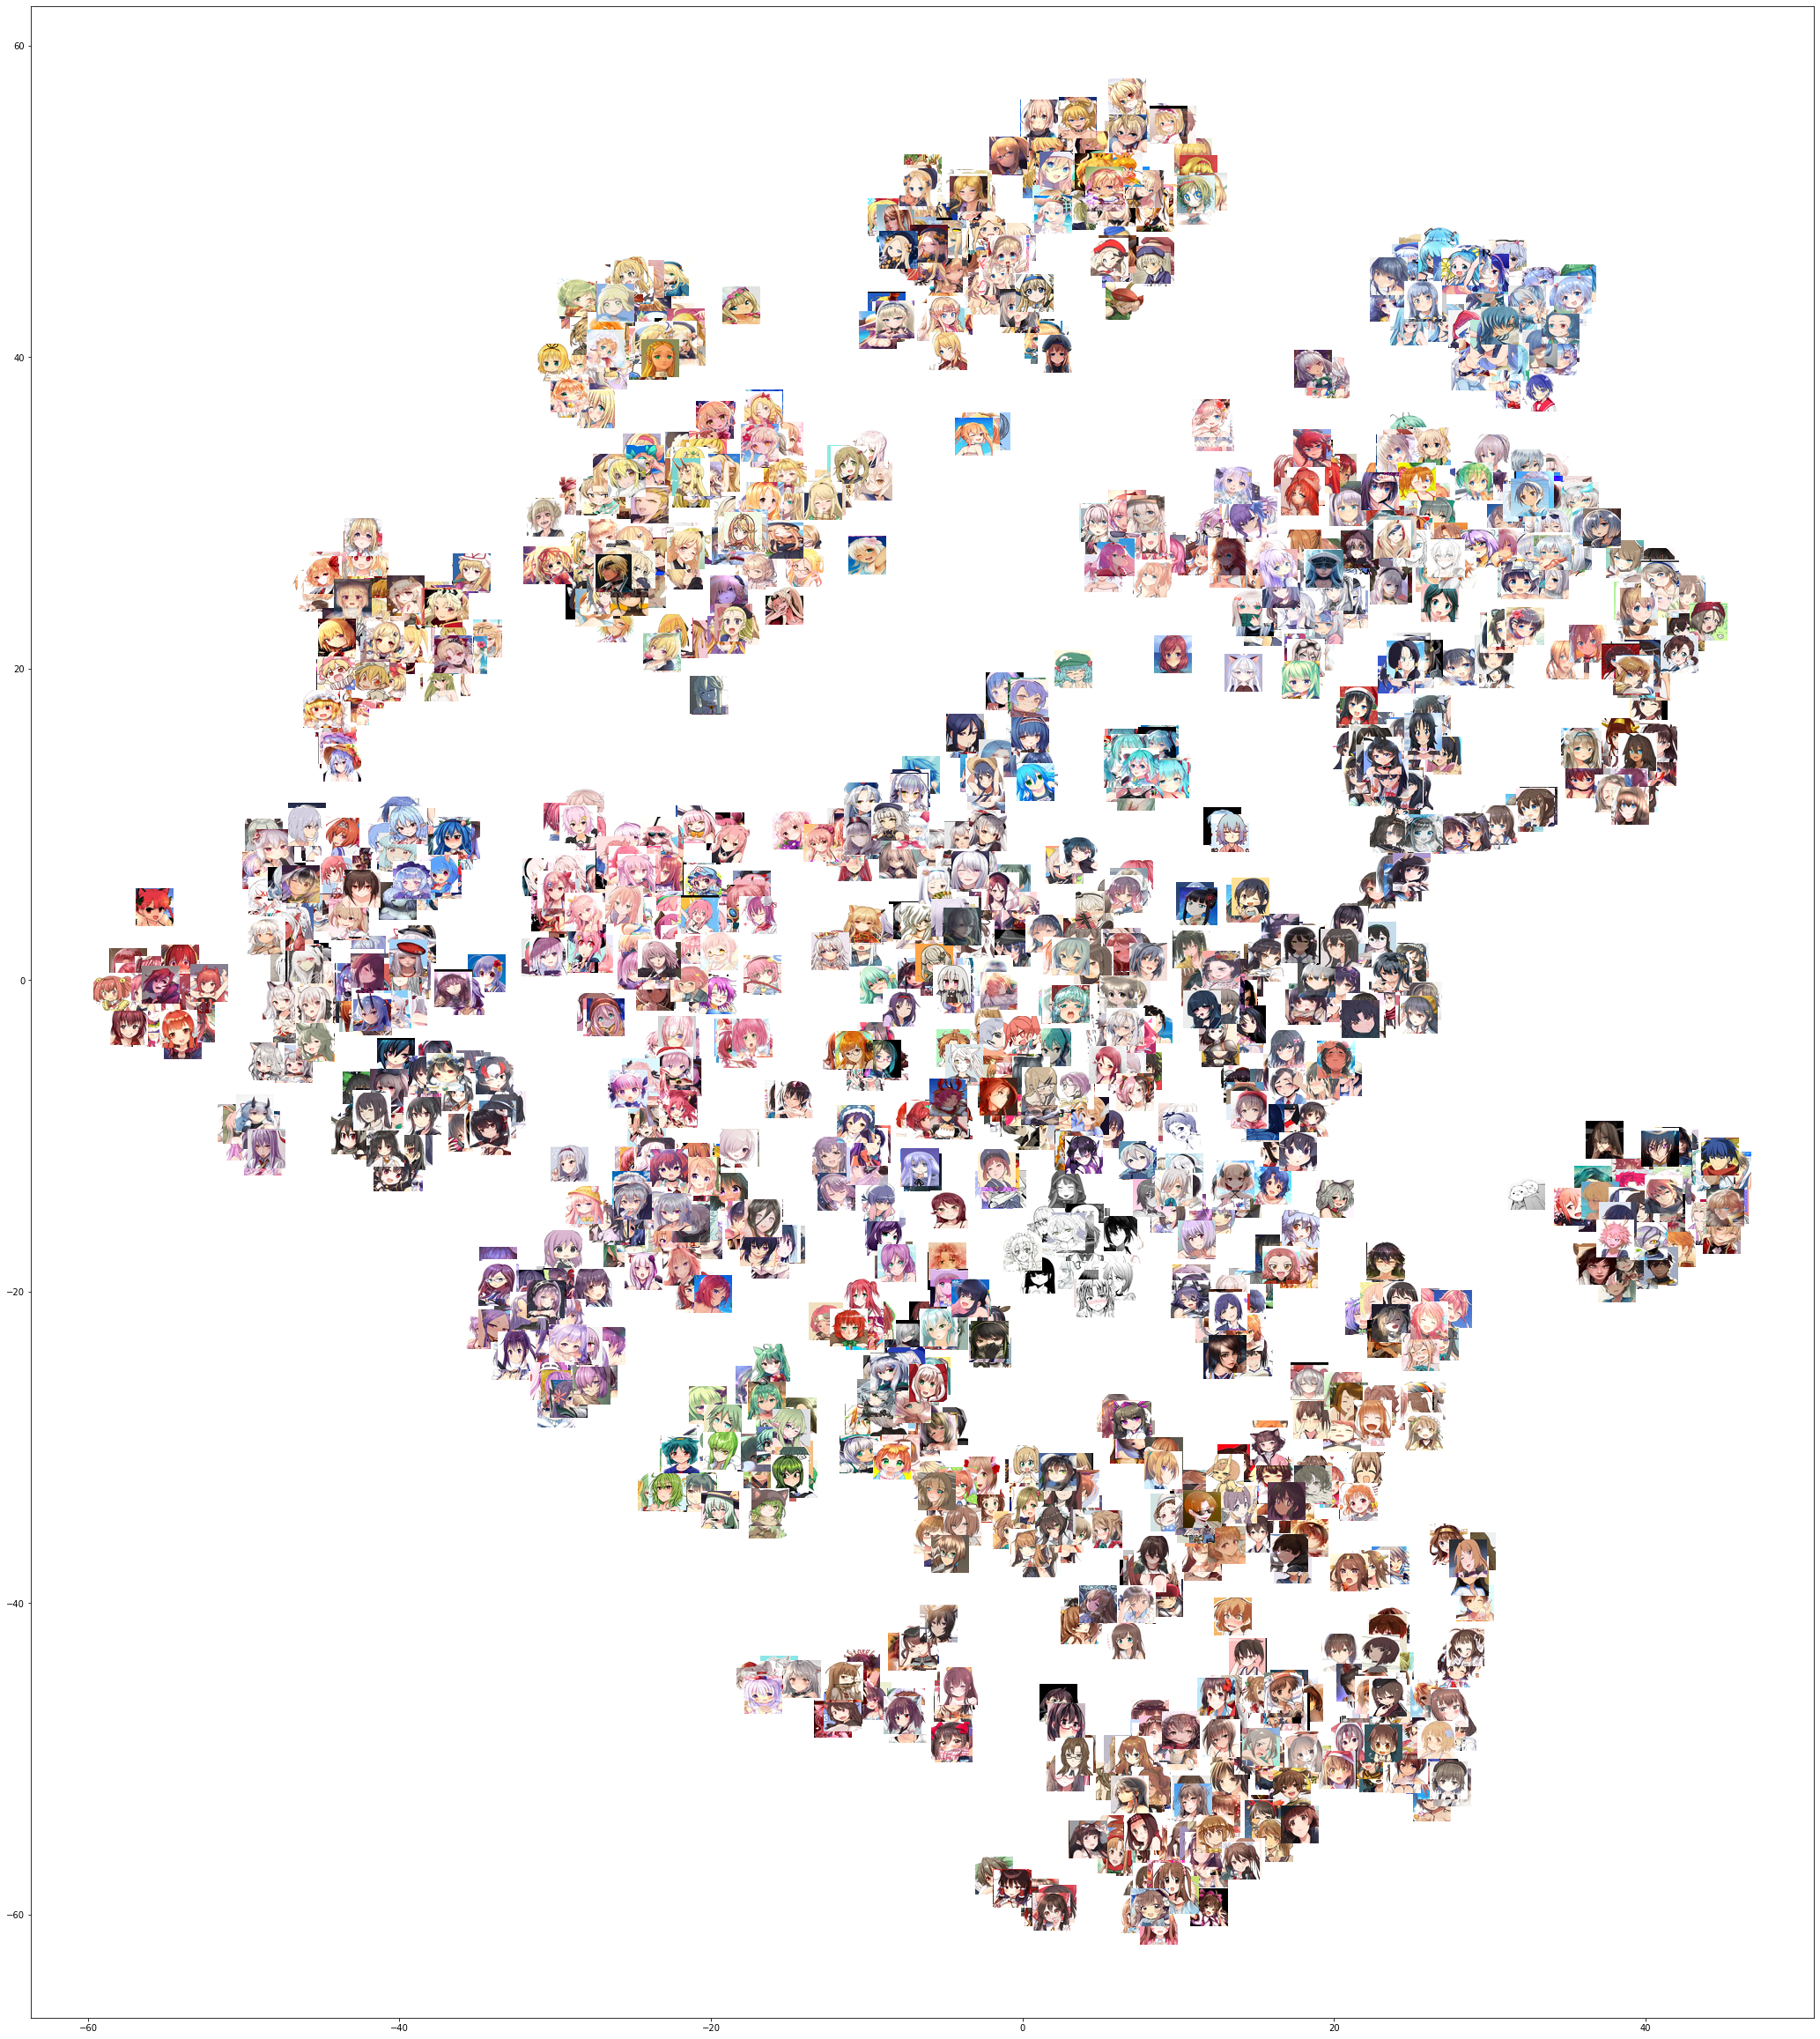

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

in_path = "/Users/gaobohao/db/sample2000/data/"
im = Image.open(os.path.join(in_path, "1947625.png"))

def small_image(eta=0.5, in_path="", out_path=""):
    if not os.path.exists(out_path):
        os.makedirs(out_path)

    for root,middle,files in os.walk(in_path):
        counter = 0
        for i in sorted(files)[1:]:
            im = Image.open(os.path.join(in_path, i))
            (ox,oy) = im.size
            s_img = im.resize((int(ox*eta), int(oy*eta)), Image.ANTIALIAS)
            s_img.save( os.path.join(out_path, str(counter)+'.png') )
            counter += 1

def get_image(path):
    return OffsetImage(plt.imread(path))

def mnist_images(small_path,s):
    
    
    
    
    small_path = small_path
    
    #small_image(eta=eta, in_path=in_path, out_path=small_path)
    
   
    (n, m) = Y.shape
    plt.figure()
    fig, ax = plt.subplots(figsize = (s,s))
    ax.scatter(Y[:, 0], Y[:, 1])
    plt.set_cmap(cm.gray)  # 修改颜色映射
    
    for i in range(0, n):
        p = small_path + str(i)+".png"
        #print(p)
        ab = AnnotationBbox(get_image(p), (Y[i, 0], Y[i, 1]), frameon=False)
        ax.add_artist(ab)
    
    ax = plt.gca()
    ax.set_aspect(1)
    plt.savefig(str(s) + '.png')
    plt.show()
    


small_image(0.028,in_path, "/Users/gaobohao/db/sample2000/small_data/")
small_image(0.06,in_path, "/Users/gaobohao/db/sample2000/small_data_2/")
small_image(0.084,in_path, "/Users/gaobohao/db/sample2000/small_data_3/")

mnist_images("/Users/gaobohao/db/sample2000/small_data/", 14)
mnist_images("/Users/gaobohao/db/sample2000/small_data_2/", 29)
mnist_images("/Users/gaobohao/db/sample2000/small_data_3/", 42)